In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
#import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/googleplaystore .csv')


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Cleaning the dataset
#First look dataset Column
df.info()
#Lets Check out the nul value and dealing with them
df.isnull().sum()
# Clearly 'Rating' column has most null value and it is our the dependent variable.
# The best way to fill missing values might be using the median instead of mean.
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# convert reviews to numeric
df['Reviews'] = pd.to_numeric(df.Reviews, errors = 'coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#Let's look at the apps in the data 
df.App.value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Bowmasters                                            6
Subway Surfers                                        6
Nick                                                  6
Temple Run 2                                          6
Helix Jump                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
MLB At Bat                                            5
MeetMe: Chat & Meet New People                  

In [6]:
# Let's check out the App categories
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [7]:
#Now remove the catagories 1.9 which is irrelevant for our model
df[df['Category'] == '1.9']
df = df.drop([10472])

In [8]:
#Drops other duplicate entries keeping the App with the highest reviews
df.drop_duplicates('App', keep = 'last', inplace = True)
df.App.value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook      1
Rockstars of Ooo                                    1
Angelo Rules - Crazy day                            1
Flipped Out! - Powerpuff Girls                      1
Adventure Time Game Wizard                          1
                                                   ..
Mopar Drag N Brag                                   1
Read Unlimitedly! Kids'n Books                      1
Dark Infusion Substratum Theme for Android N & O    1
Fantastic Chefs: Match 'n Cook                      1
iHoroscope - 2018 Daily Horoscope & Astrology       1
Name: App, Length: 9659, dtype: int64

In [9]:
#lets Deal with the Size of Apps
df.Size.value_counts()

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [10]:
#Now Convert non nemurice value to 'NaN' value
df['Size'][df['Size' ] == 'Varies with devices'] = np.nan

In [11]:
#Now Convert M with Million and K with Thousand
df['Size'] = df.Size.str.replace('M', 'e6')
df['Size'] = df.Size.str.replace('K', 'e3')


In [12]:
#Now Convert to the nemuric value
df['Size'] = pd.to_numeric(df['Size'], errors = 'coerce')
#Replace the "NaN' Value with Mean 
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [13]:
#Now lets Check the Install
df.Installs.value_counts()

1,000,000+        1419
100,000+          1114
10,000+           1031
10,000,000+        933
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        204
50+                204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [14]:
#Now replace '+' and ',' signs and convert to numeric value
df['Installs'] = df.Installs.str.replace('+', '')
df['Installs'] = df.Installs.str.replace(',', '')

In [15]:
#Now Convert to the nemuric value
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [16]:
#Now Build the Machine Learning Model
#Now Lets take matrix of features
x = df.iloc[:,3:6].values
y = df.iloc[:,2].values

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
#Fitting Random Forest Regression to tranning set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [19]:
y_pred = regressor.predict(x_test)

In [20]:
print(y_pred)

[4.34   3.8715 4.2895 ... 4.3585 4.016  4.164 ]


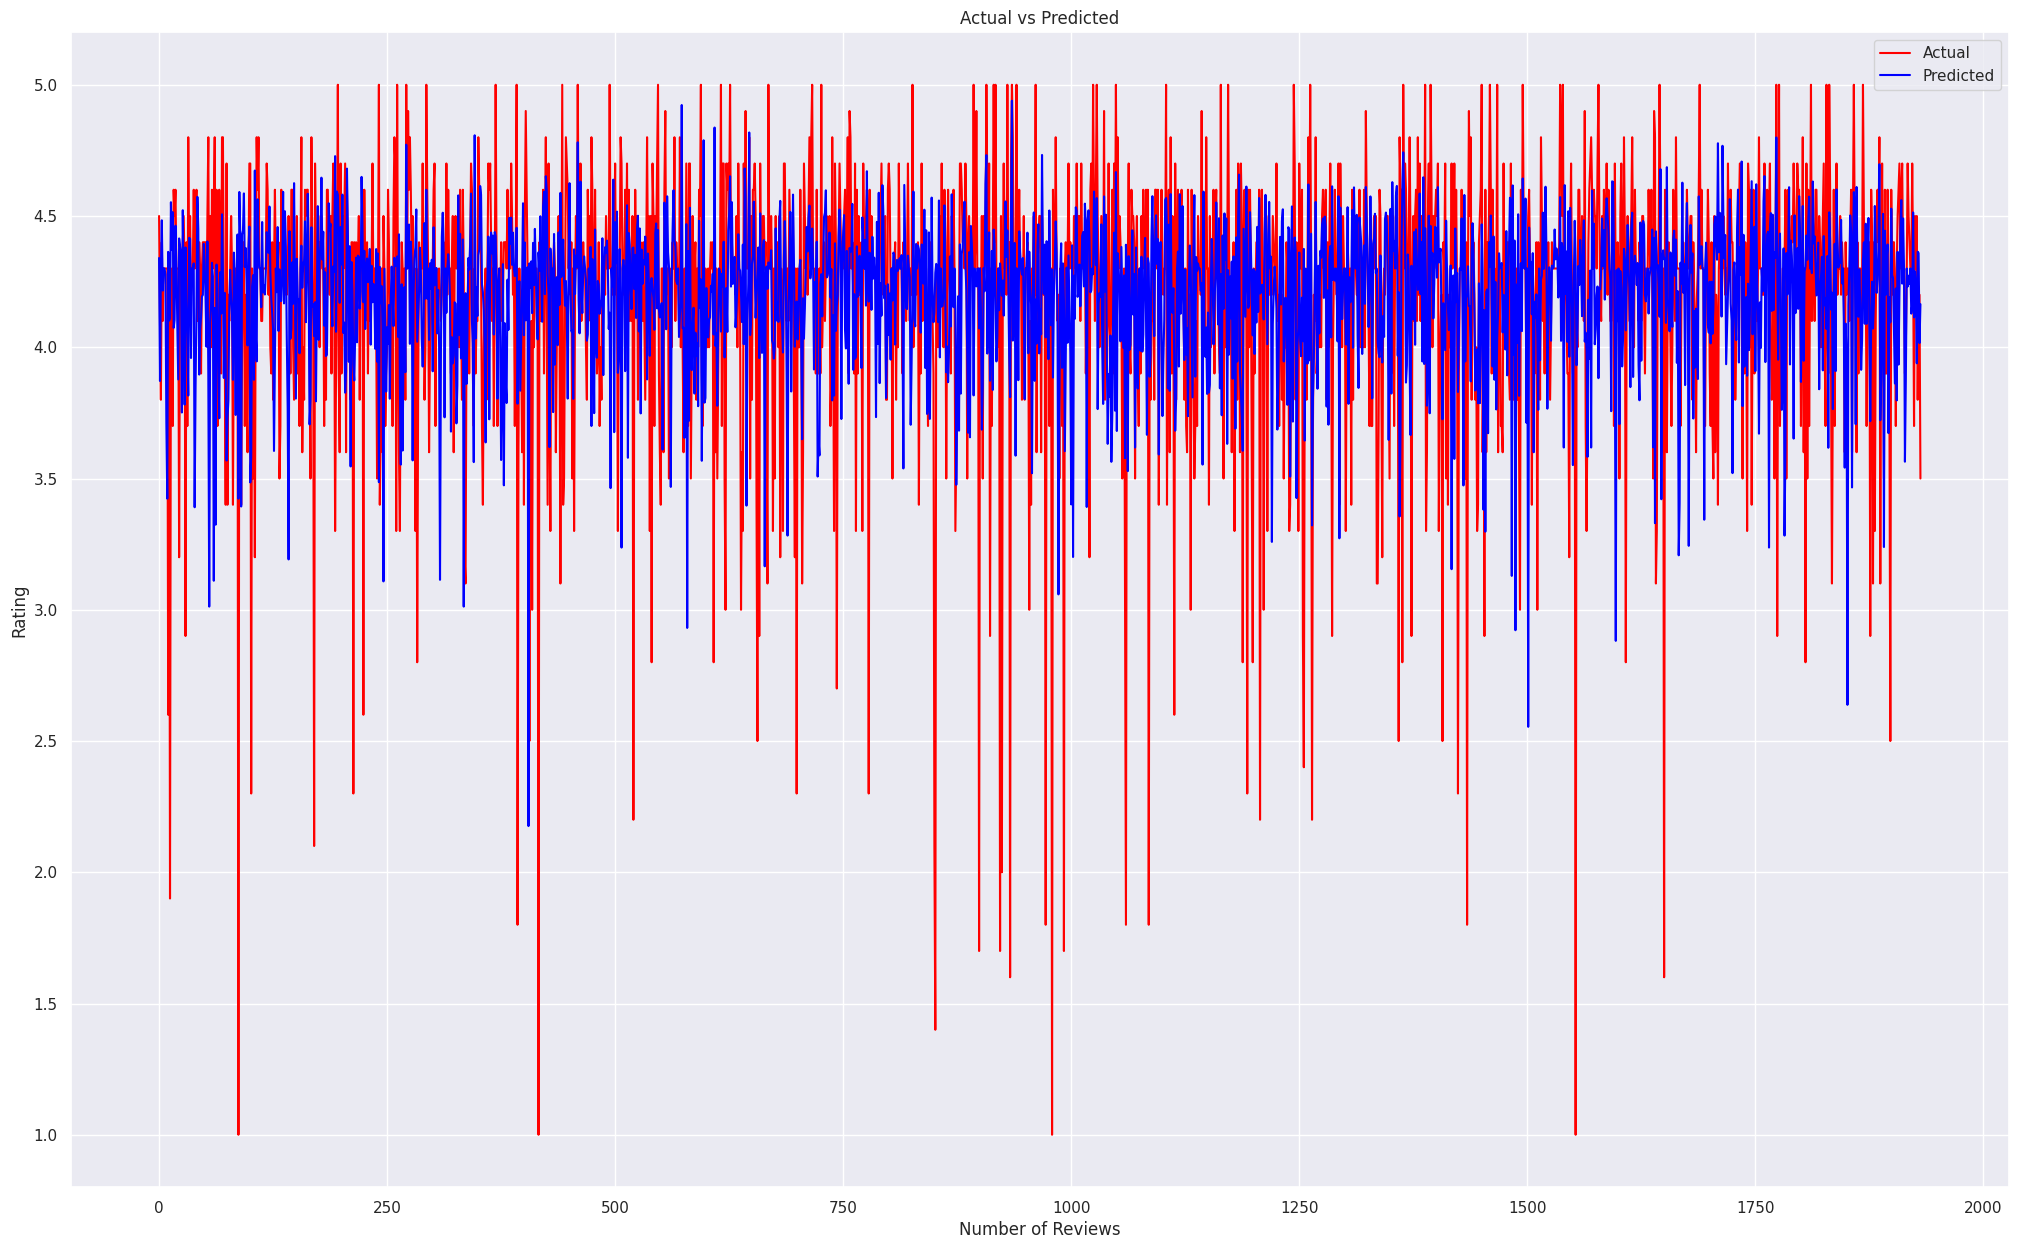

In [21]:
#Visualising the Predicted Result
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'red', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [22]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.5 MB/s eta 0:00:00
  Preparing metad

In [23]:
import gradio as gr

def predict_rating(app_name, category, reviews, size, installs, typ):
    # Your prediction code goes here
    prediction = 4.7
    return str(prediction)

# Create the Gradio app
gr.Interface(
    fn=predict_rating,
    inputs=[
        gr.inputs.Textbox(label="Enter the name of the app"),
        gr.inputs.Dropdown(choices=df['Category'].unique().tolist(), label="Category"),
        gr.inputs.Slider(minimum=0, maximum=1000000, label="Number of reviews"),
        gr.inputs.Slider(minimum=0, maximum=1000, default=50, label="Size (in MB)"),
        gr.inputs.Dropdown(choices=["0", "1-10", "10-50", "50-100", "100-500", "500-1000", "1000-5000", "5000-10000", "10000-50000", "50000-100000", "100000-500000", "500000-1000000", "1000000+"], label="Number of installs"),
        gr.inputs.Dropdown(choices=["Free", "Paid"], label="Type")
    ],
    outputs=gr.outputs.Label(label="Predicted rating"),
    title="App Rating Predictor",
    description="Enter the details of an app to predict its rating"
).launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>